# 芝加哥犯罪数据描述性统计分析 (2015-2025)

## 核心发现

1. **犯罪高度集中** - 盗窃(22.5%) + 殴打(18.3%) + 财产破坏(11.1%)占总数51.9%

2. **街道成为高危区** - 街道犯罪占24.4%，其中盗窃最多(24.7%)

3. **逮捕效率悬殊** - 毒品逮捕率99.5% vs 盗窃13% (差异超7倍)

4. **疫情明显印记** - 2020年下降18%，之后逐年回升

5. **隐性的家暴危机** - 占比19.3%且逮捕率偏低(16.1%)

## 第1部分：导入库和加载数据

In [1]:
%pip install pandas numpy matplotlib scipy -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from datetime import datetime
import os

warnings.filterwarnings('ignore')

# 设置显示选项和中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: f'{x:.2f}' if abs(x) < 1e6 else f'{x:.0f}')

# 加载数据
df = pd.read_csv('crimes_2015_2025.csv')

print("数据加载成功！")
print(f"数据集大小: {df.shape[0]:,} 行 × {df.shape[1]} 列")

Note: you may need to restart the kernel to use updated packages.
数据加载成功！
数据集大小: 2,519,477 行 × 22 列


## 第2部分：数据基本信息概览

In [2]:
print("="*80)
print("数据基本信息")
print("="*80)

print(f"\n【数据维度】")
print(f"  • 行数 (样本数): {df.shape[0]:,}")
print(f"  • 列数 (特征数): {df.shape[1]}")

print(f"\n【列信息与数据类型】")
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"  • {dtype}: {count} 列")

print(f"\n【数据类型详情】")
print(df.dtypes)

print(f"\n【前5行样本数据】")
print(df.head())

数据基本信息

【数据维度】
  • 行数 (样本数): 2,519,477
  • 列数 (特征数): 22

【列信息与数据类型】
  • object: 10 列
  • float64: 7 列
  • int64: 3 列
  • bool: 2 列

【数据类型详情】
id                        int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

【前5行样本数据】
         id case_number                     date                 block  iucr  \
0  13711023    JJ103490  2015-01-01T00:00:00.000  

## 第3部分：缺失值分析


缺失值分析

有缺失值的列:
                  列名   缺失数  缺失率(%)
        x_coordinate 42196    1.67
        y_coordinate 42196    1.67
            latitude 42196    1.67
           longitude 42196    1.67
            location 42196    1.67
location_description 12581    0.50
      community_area   176    0.01
            district     1    0.00
                ward    55    0.00

【重复值检查】
  • 重复行数: 0


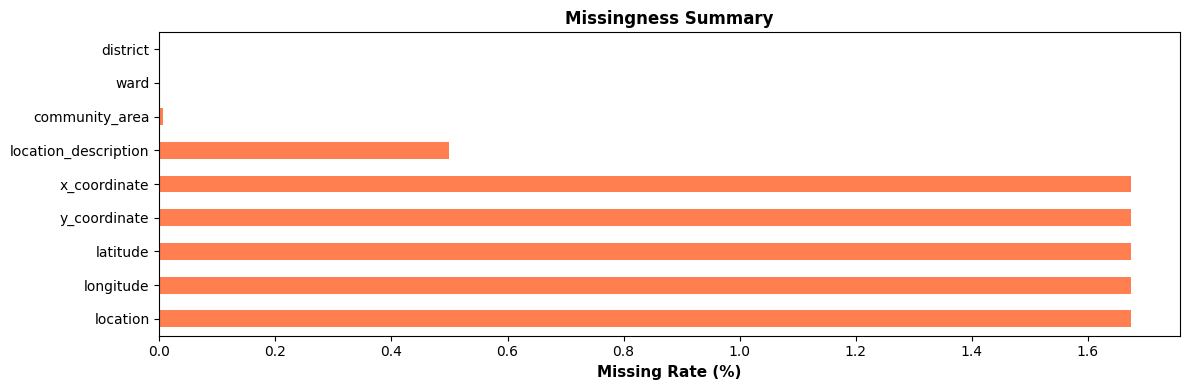

In [3]:
print("\n" + "="*80)
print("缺失值分析")
print("="*80)

missing_data = pd.DataFrame({
    '列名': df.columns,
    '缺失数': df.isnull().sum().values,
    '缺失率(%)': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['缺失数'] > 0].sort_values('缺失率(%)', ascending=False)

if len(missing_data) > 0:
    print("\n有缺失值的列:")
    print(missing_data.to_string(index=False))
else:
    print("\n无缺失值")

print(f"\n【重复值检查】")
print(f"  • 重复行数: {df.duplicated().sum():,}")

# 绘制缺失值热力图
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
if missing_pct.max() > 0:
    fig, ax = plt.subplots(figsize=(12, 4))
    missing_pct[missing_pct > 0].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Missing Rate (%)', fontsize=11, fontweight='bold')
    ax.set_title('Missingness Summary', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

## 第4部分：数值特征的描述性统计

In [4]:
print("\n" + "="*80)
print("数值特征描述性统计")
print("="*80)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(df[numeric_cols].describe().round(2))

print("\n【分位数统计】")
quantiles = df[numeric_cols].quantile([0.01, 0.25, 0.5, 0.75, 0.99]).round(2)
print(quantiles)


数值特征描述性统计
            id    beat  district    ward  community_area  x_coordinate  \
count  2519477 2519477   2519476 2519422         2519301       2477281   
mean  11823734 1148.13     11.25   23.18           36.73       1164982   
std    1235156  699.68      6.99   13.97           21.50      16349.22   
min   21714.00  111.00      1.00    1.00            1.00          0.00   
25%   10951740  611.00      6.00   10.00           23.00       1153331   
50%   11834463 1031.00     10.00   24.00           32.00       1166776   
75%   12791906 1722.00     17.00   34.00           54.00       1176589   
max   14101133 2535.00     31.00   50.00           77.00       1205119   

       y_coordinate    year  latitude  longitude  
count       2477281 2519477   2477281    2477281  
mean        1886490 2019.41     41.84     -87.67  
std        31564.64    2.92      0.09       0.06  
min            0.00 2015.00     36.62     -91.69  
25%         1859191 2017.00     41.77     -87.71  
50%         1893

## 第5部分：分类特征统计与可视化


分类特征统计

【逮捕情况】
  已逮捕: 443,105 (17.59%)
  未逮捕: 2,076,372 (82.41%)

【家庭暴力相关】
  涉及家庭暴力: 487,346 (19.34%)
  无家庭暴力: 2,032,131 (80.66%)


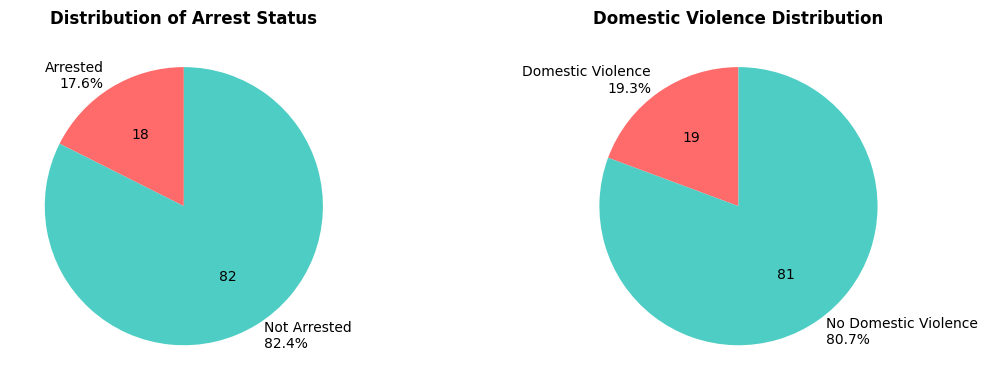

In [5]:
print("\n" + "="*80)
print("分类特征统计")
print("="*80)

# 逮捕情况
print("\n【逮捕情况】")
arrest_counts = df['arrest'].value_counts()
arrest_pct = df['arrest'].value_counts(normalize=True) * 100
print(f"  已逮捕: {arrest_counts.get(True, 0):,} ({arrest_pct.get(True, 0):.2f}%)")
print(f"  未逮捕: {arrest_counts.get(False, 0):,} ({arrest_pct.get(False, 0):.2f}%)")

# 家庭暴力
print("\n【家庭暴力相关】")
domestic_counts = df['domestic'].value_counts()
domestic_pct = df['domestic'].value_counts(normalize=True) * 100
print(f"  涉及家庭暴力: {domestic_counts.get(True, 0):,} ({domestic_pct.get(True, 0):.2f}%)")
print(f"  无家庭暴力: {domestic_counts.get(False, 0):,} ({domestic_pct.get(False, 0):.2f}%)")

# 创建关键指标的可视化
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 逮捕率饼图
colors1 = ['#FF6B6B', '#4ECDC4']
values = [arrest_counts.get(True, 0), arrest_counts.get(False, 0)]
labels = [f'Arrested\n{arrest_pct.get(True, 0):.1f}%', f'Not Arrested\n{arrest_pct.get(False, 0):.1f}%']
axes[0].pie(values, labels=labels, colors=colors1, autopct='%1.0f', startangle=90)
axes[0].set_title('Distribution of Arrest Status', fontsize=12, fontweight='bold')

# 家庭暴力饼图
colors2 = ['#FF6B6B', '#4ECDC4']
values2 = [domestic_counts.get(True, 0), domestic_counts.get(False, 0)]
labels2 = [f'Domestic Violence\n{domestic_pct.get(True, 0):.1f}%', f'No Domestic Violence\n{domestic_pct.get(False, 0):.1f}%']
axes[1].pie(values2, labels=labels2, colors=colors2, autopct='%1.0f', startangle=90)
axes[1].set_title('Domestic Violence Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 第6部分：时间序列趋势分析


📈 时间序列分析

【时间范围】
  • 开始时间: 2015-01-01 00:00:00
  • 结束时间: 2024-12-31 23:58:00
  • 数据跨度: 3652 天

【年度案件统计】
  2015 年:  264,887 起 (10.51%)
  2016 年:  269,953 起 (10.71%)
  2017 年:  269,282 起 (10.69%)
  2018 年:  269,141 起 (10.68%)
  2019 年:  261,694 起 (10.39%)
  2020 年:  212,694 起 ( 8.44%)
  2021 年:  209,638 起 ( 8.32%)
  2022 年:  239,980 起 ( 9.52%)
  2023 年:  263,254 起 (10.45%)
  2024 年:  258,954 起 (10.28%)


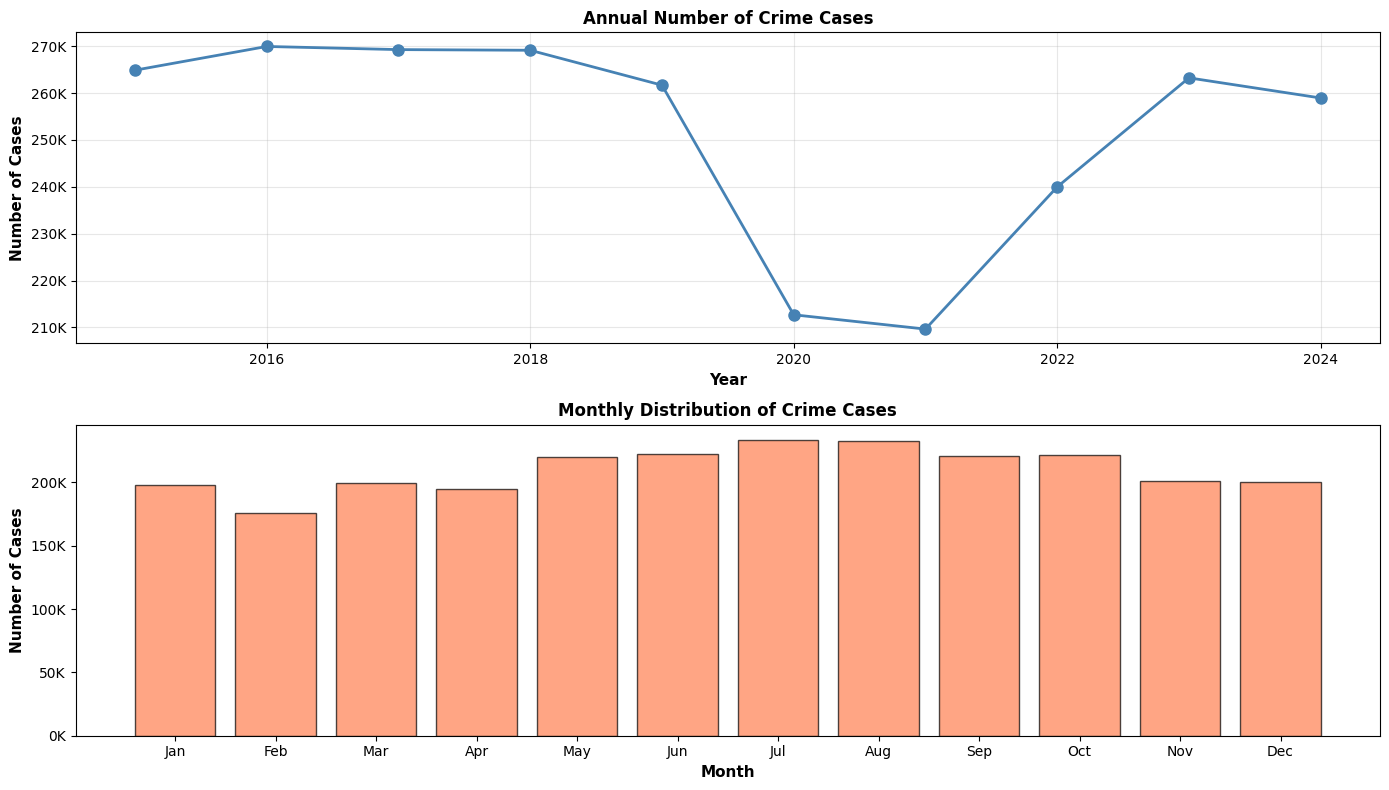


【星期分布】
  Mon:  359,331 起 (14.26%)
  Tue:  354,126 起 (14.06%)
  Wed:  355,576 起 (14.11%)
  Thu:  354,729 起 (14.08%)
  Fri:  373,607 起 (14.83%)
  Sat:  365,679 起 (14.51%)
  Sun:  356,429 起 (14.15%)


In [6]:
print("\n" + "="*80)
print("📈 时间序列分析")
print("="*80)

# 解析日期
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week

print(f"\n【时间范围】")
print(f"  • 开始时间: {df['date'].min()}")
print(f"  • 结束时间: {df['date'].max()}")
print(f"  • 数据跨度: {(df['date'].max() - df['date'].min()).days} 天")

# 年度统计
print(f"\n【年度案件统计】")
yearly = df['year'].value_counts().sort_index()
for year, count in yearly.items():
    pct = count / len(df) * 100
    print(f"  {int(year)} 年: {count:>8,} 起 ({pct:>5.2f}%)")

# 年度趋势可视化
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8))

# 时间序列折线图
yearly.plot(ax=ax1, marker='o', linewidth=2, markersize=8, color='steelblue')
ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax1.set_title('Annual Number of Crime Cases', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# 月度分布
monthly = df['month'].value_counts().sort_index()
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.bar(monthly.index, monthly.values, color='coral', alpha=0.7, edgecolor='black', linewidth=1)
ax2.set_xlabel('Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax2.set_title('Monthly Distribution of Crime Cases', fontsize=12, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(months_labels, fontsize=10)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

# 按星期统计
print(f"\n【星期分布】")
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_zh = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = df['day_of_week'].value_counts().reindex(day_order)
for day_en, day_cn, count in zip(day_order, day_zh, day_counts.values):
    if pd.notna(count):
        pct = count / len(df) * 100
        print(f"  {day_cn}: {int(count):>8,} 起 ({pct:>5.2f}%)")

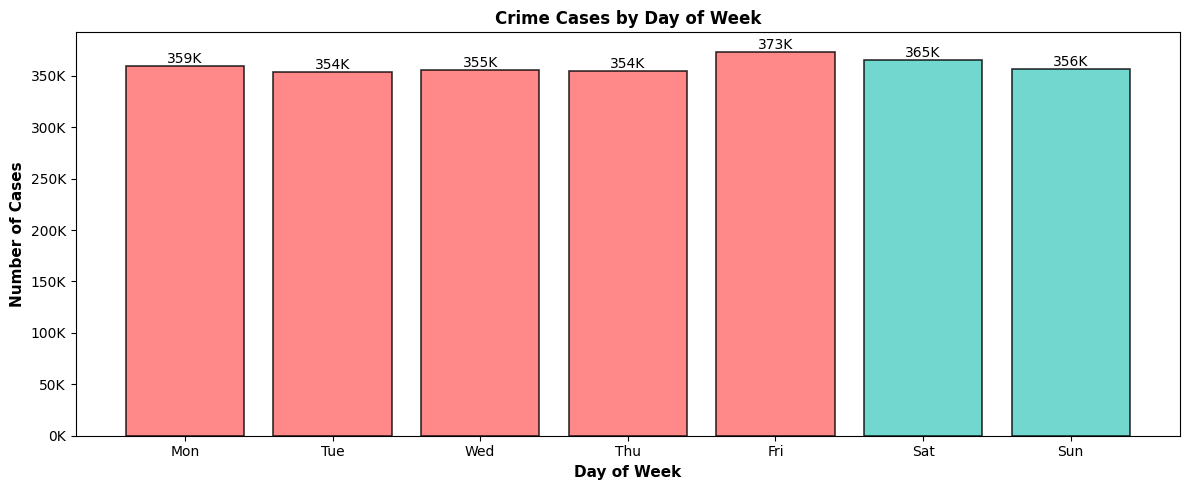

In [7]:
# 星期分布可视化
fig, ax = plt.subplots(figsize=(12, 5))
colors_day = ['#FF6B6B']*5 + ['#4ECDC4']*2  # 工作日红色，周末青色
bars = ax.bar(day_zh, day_counts.values, color=colors_day, alpha=0.8, edgecolor='black', linewidth=1.2)
ax.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax.set_xlabel('Day of Week', fontsize=11, fontweight='bold')
ax.set_title('Crime Cases by Day of Week', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height/1000)}K', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 第7部分：犯罪类型分布分析


犯罪类型分析

【犯罪类型数统计】
  • 不同犯罪类型数: 33

【Top 15 犯罪类型统计】
 1. THEFT                                  566,267 起 ( 22.48%)
 2. BATTERY                                461,186 起 ( 18.30%)
 3. CRIMINAL DAMAGE                        279,122 起 ( 11.08%)
 4. ASSAULT                                201,657 起 (  8.00%)
 5. DECEPTIVE PRACTICE                     182,390 起 (  7.24%)
 6. OTHER OFFENSE                          160,270 起 (  6.36%)
 7. MOTOR VEHICLE THEFT                    144,703 起 (  5.74%)
 8. NARCOTICS                              106,735 起 (  4.24%)
 9. BURGLARY                               100,794 起 (  4.00%)
10. ROBBERY                                 96,059 起 (  3.81%)
11. WEAPONS VIOLATION                       65,935 起 (  2.62%)
12. CRIMINAL TRESPASS                       54,726 起 (  2.17%)
13. OFFENSE INVOLVING CHILDREN              21,814 起 (  0.87%)
14. PUBLIC PEACE VIOLATION                  12,847 起 (  0.51%)
15. SEX OFFENSE                             11,806 起 (  0.47%)


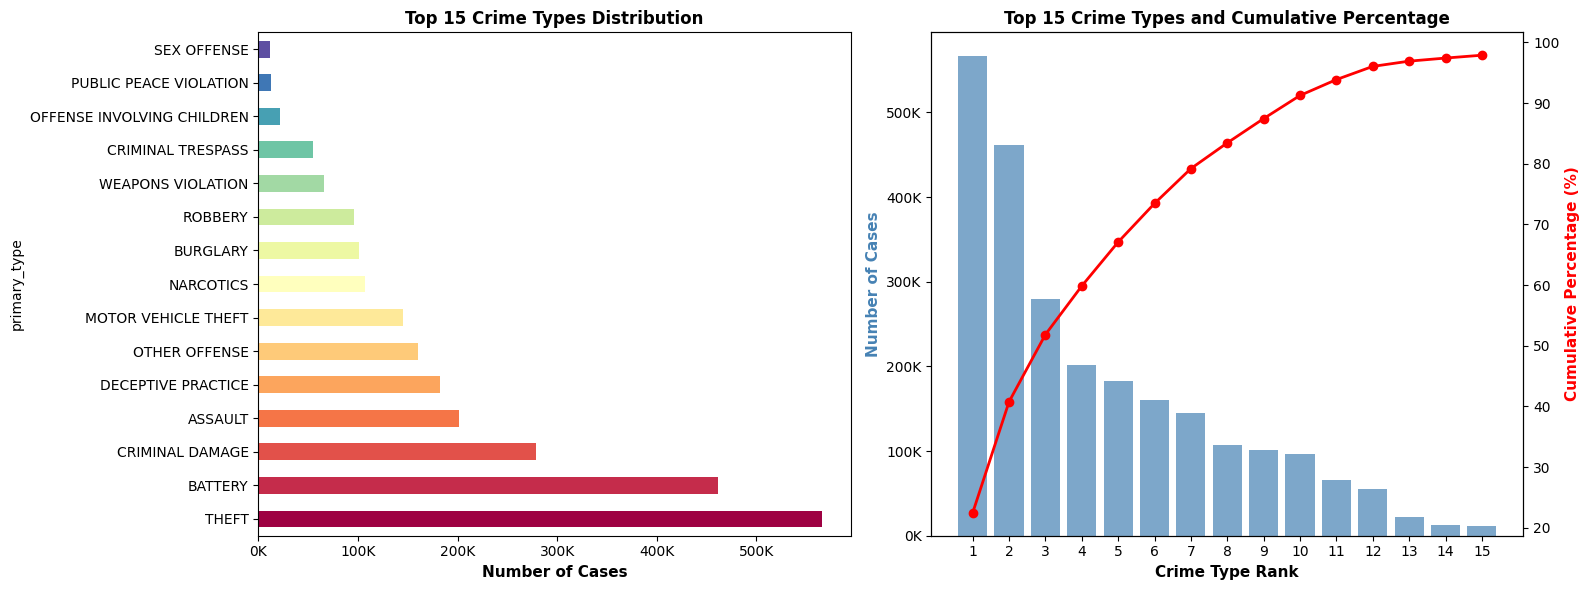

In [8]:
print("\n" + "="*80)
print("犯罪类型分析")
print("="*80)

print(f"\n【犯罪类型数统计】")
crime_types = df['primary_type'].nunique()
print(f"  • 不同犯罪类型数: {crime_types}")

# Top 15犯罪类型
top_crimes = df['primary_type'].value_counts().head(15)
print(f"\n【Top 15 犯罪类型统计】")
for idx, (crime, count) in enumerate(top_crimes.items(), 1):
    pct = count / len(df) * 100
    print(f"{idx:2d}. {crime:35s} {count:>10,} 起 ({pct:>6.2f}%)")

# Top 15犯罪类型可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 水平柱状图
top_crimes.plot(kind='barh', ax=ax1, color=plt.cm.Spectral(np.linspace(0, 1, 15)))
ax1.set_xlabel('Number of Cases', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Crime Types Distribution', fontsize=12, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# 累积占比图
cumulative_pct = (top_crimes.cumsum() / len(df) * 100)
ax2.bar(range(len(top_crimes)), top_crimes.values, color='steelblue', alpha=0.7, label='案件数')
ax2_twin = ax2.twinx()
ax2_twin.plot(range(len(top_crimes)), cumulative_pct.values, 'r-o', linewidth=2, markersize=6, label='Cumulative %')
ax2.set_xlabel('Crime Type Rank', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Cases', fontsize=11, fontweight='bold', color='steelblue')
ax2_twin.set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold', color='red')
ax2.set_title('Top 15 Crime Types and Cumulative Percentage', fontsize=12, fontweight='bold')
ax2.set_xticks(range(len(top_crimes)))
ax2.set_xticklabels(range(1, len(top_crimes)+1))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

## 第8部分：地理位置热点分析


📍 地理位置与地点分析

【高发犯罪地点 Top 15】
 1. STREET                                 614,837 起 ( 24.40%)
 2. APARTMENT                              399,109 起 ( 15.84%)
 3. RESIDENCE                              388,705 起 ( 15.43%)
 4. SIDEWALK                               178,399 起 (  7.08%)
 5. SMALL RETAIL STORE                      67,485 起 (  2.68%)
 6. OTHER                                   55,950 起 (  2.22%)
 7. RESTAURANT                              55,683 起 (  2.21%)
 8. ALLEY                                   53,015 起 (  2.10%)
 9. VEHICLE NON-COMMERCIAL                  40,772 起 (  1.62%)
10. DEPARTMENT STORE                        40,467 起 (  1.61%)
11. PARKING LOT/GARAGE(NON.RESID.)          39,781 起 (  1.58%)
12. PARKING LOT / GARAGE (NON RESIDENTI     39,505 起 (  1.57%)
13. GAS STATION                             33,042 起 (  1.31%)
14. GROCERY FOOD STORE                      28,431 起 (  1.13%)
15. RESIDENTIAL YARD (FRONT/BACK)           26,637 起 (  1.06%)

【警务辖区(Beat) 热点 Top 10】
 

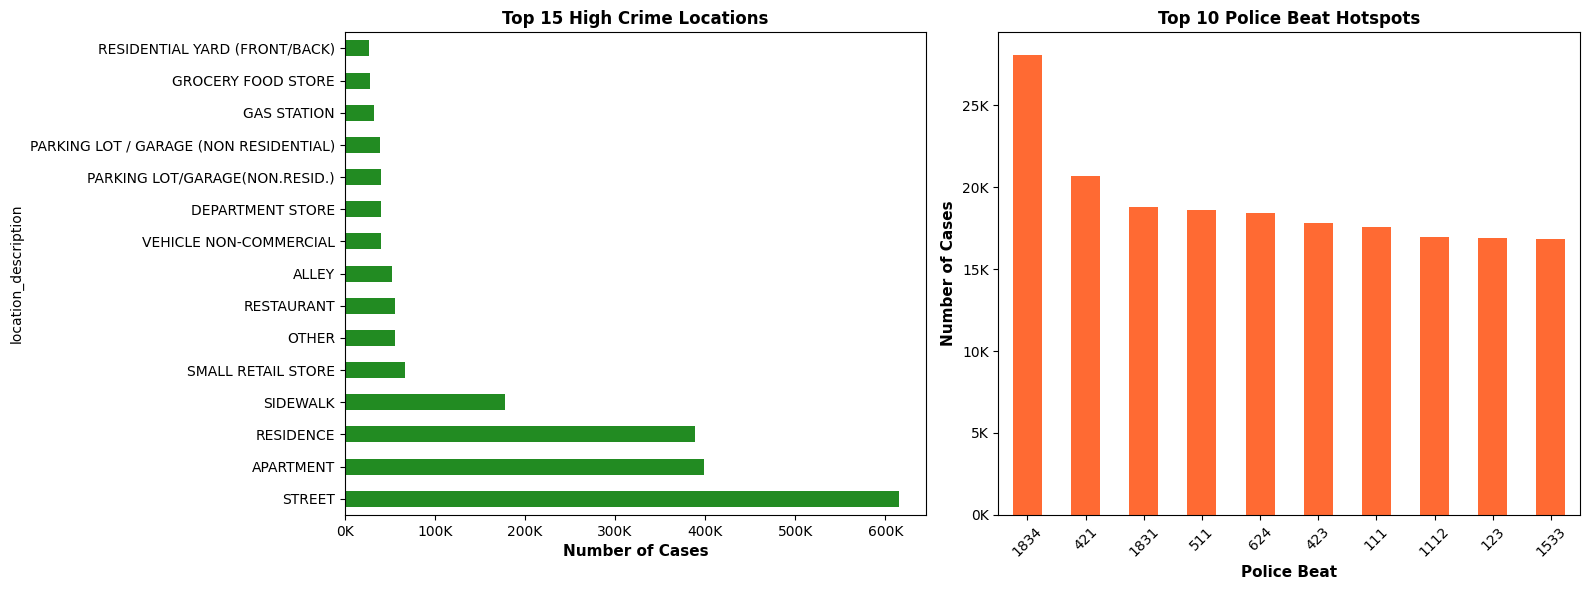


【社区(Community Area)统计】
  • 涉及社区数: 77
  • 社区区间: 1 - 77

【地理坐标信息】
  • 有坐标数据的案件: 2,477,281 (98.33%)
  • X坐标范围: 0 - 1205119
  • Y坐标范围: 0 - 1951535
  • 完整经纬度: 2,477,281 (98.33%)


In [18]:
print("\n" + "="*80)
print("📍 地理位置与地点分析")
print("="*80)

# 地点统计
print(f"\n【高发犯罪地点 Top 15】")
top_locations = df['location_description'].value_counts().head(15)
for idx, (location, count) in enumerate(top_locations.items(), 1):
    pct = count / len(df) * 100
    print(f"{idx:2d}. {str(location)[:35]:35s} {count:>10,} 起 ({pct:>6.2f}%)")

# 地点分布可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 水平柱状图
top_locations.plot(kind='barh', ax=ax1, color='forestgreen')
ax1.set_xlabel('Number of Cases', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 High Crime Locations', fontsize=12, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# 警务辖区(Beat)热点
print(f"\n【警务辖区(Beat) 热点 Top 10】")
top_beats = df['beat'].value_counts().head(10)
for idx, (beat, count) in enumerate(top_beats.items(), 1):
    pct = count / len(df) * 100
    print(f"{idx:2d}. Beat {str(beat):8s} {count:>10,} 起 ({pct:>6.2f}%)")

top_beats.plot(kind='bar', ax=ax2, color='orangered', alpha=0.8)
ax2.set_xlabel('Police Beat', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax2.set_title('Top 10 Police Beat Hotspots', fontsize=12, fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 社区分析
print(f"\n【社区(Community Area)统计】")
community_counts = df['community_area'].value_counts()
print(f"  • 涉及社区数: {len(community_counts)}")
print(f"  • 社区区间: {df['community_area'].min():.0f} - {df['community_area'].max():.0f}")

# 坐标信息
print(f"\n【地理坐标信息】")
print(f"  • 有坐标数据的案件: {df['x_coordinate'].notna().sum():,} ({df['x_coordinate'].notna().sum()/len(df)*100:.2f}%)")
print(f"  • X坐标范围: {df['x_coordinate'].min():.0f} - {df['x_coordinate'].max():.0f}")
print(f"  • Y坐标范围: {df['y_coordinate'].min():.0f} - {df['y_coordinate'].max():.0f}")
print(f"  • 完整经纬度: {(df['latitude'].notna() & df['longitude'].notna()).sum():,} ({(df['latitude'].notna() & df['longitude'].notna()).sum()/len(df)*100:.2f}%)")

## 第9部分：深层关联分析


🔗 关键关联分析

【按犯罪类型的逮捕率】
                                      逮捕数      总数  逮捕率(%)
primary_type                                             
GAMBLING                             1115    1117   99.82
NARCOTICS                          106173  106735   99.47
PROSTITUTION                         5395    5427   99.41
LIQUOR LAW VIOLATION                 2103    2122   99.10
CONCEALED CARRY LICENSE VIOLATION    1359    1404   96.79
PUBLIC INDECENCY                       89      92   96.74
INTERFERENCE WITH PUBLIC OFFICER     8238    8821   93.39
OBSCENITY                             415     594   69.87
WEAPONS VIOLATION                   43111   65935   65.38
PUBLIC PEACE VIOLATION               7785   12847   60.60

【家庭暴力相关的犯罪类型】
primary_type
BATTERY                       256946
OTHER OFFENSE                  62143
ASSAULT                        60210
CRIMINAL DAMAGE                39978
THEFT                          27146
OFFENSE INVOLVING CHILDREN     17326
CRIMINAL TRESPASS              

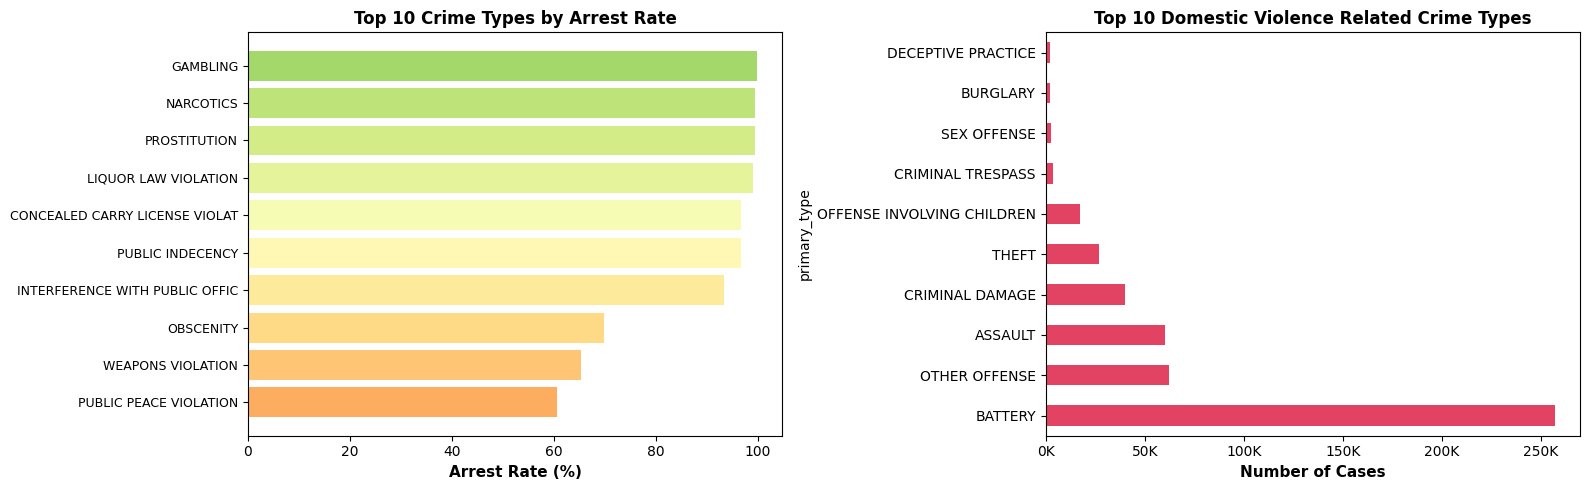


【按月份的逮捕率】
       逮捕率(%)
month        
1       19.17
2       20.19
3       19.61
4       18.36
5       18.29
6       17.15
7       17.02
8       16.72
9       16.71
10      16.07
11      16.63
12      15.97


In [20]:
print("\n" + "="*80)
print("🔗 关键关联分析")
print("="*80)

# 1. 按犯罪类型的逮捕率
print(f"\n【按犯罪类型的逮捕率】")
crime_arrest = df.groupby('primary_type').agg({
    'arrest': ['sum', 'count']
}).round(2)
crime_arrest.columns = ['逮捕数', '总数']
crime_arrest['逮捕率(%)'] = (crime_arrest['逮捕数'] / crime_arrest['总数'] * 100).round(2)
crime_arrest = crime_arrest.sort_values('逮捕率(%)', ascending=False).head(10)
print(crime_arrest)

# 逮捕率可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Top 10逮捕率
crime_arrest_sorted = crime_arrest.sort_values('逮捕率(%)', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.7, len(crime_arrest_sorted)))
ax1.barh(range(len(crime_arrest_sorted)), crime_arrest_sorted['逮捕率(%)'].values, color=colors)
ax1.set_yticks(range(len(crime_arrest_sorted)))
ax1.set_yticklabels([label[:30] for label in crime_arrest_sorted.index], fontsize=9)
ax1.set_xlabel('Arrest Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Top 10 Crime Types by Arrest Rate', fontsize=12, fontweight='bold')

# 2. 家庭暴力相关的犯罪类型
print(f"\n【家庭暴力相关的犯罪类型】")
domestic_crimes = df[df['domestic'] == True]['primary_type'].value_counts().head(10)
print(domestic_crimes)

domestic_crimes.plot(kind='barh', ax=ax2, color='crimson', alpha=0.8)
ax2.set_xlabel('Number of Cases', fontsize=11, fontweight='bold')
ax2.set_title('Top 10 Domestic Violence Related Crime Types', fontsize=12, fontweight='bold')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()

# 3. 按月份的逮捕率趋势
print(f"\n【按月份的逮捕率】")
monthly_arrest = df.groupby('month')['arrest'].agg(['sum', 'count'])
monthly_arrest['逮捕率(%)'] = (monthly_arrest['sum'] / monthly_arrest['count'] * 100).round(2)
print(monthly_arrest[['逮捕率(%)']])


【地点与逮捕率】
                                                逮捕率(%)
location_description                                  
POLICE FACILITY/VEH PARKING LOT                  70.32
POLICE FACILITY / VEHICLE PARKING LOT            55.36
CHA PARKING LOT/GROUNDS                          47.56
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA   46.12
ABANDONED BUILDING                               43.41
CTA STATION                                      40.20
TAVERN/LIQUOR STORE                              39.83
GROCERY FOOD STORE                               38.47
AIRPORT TERMINAL UPPER LEVEL - SECURE AREA       38.41
DEPARTMENT STORE                                 37.55


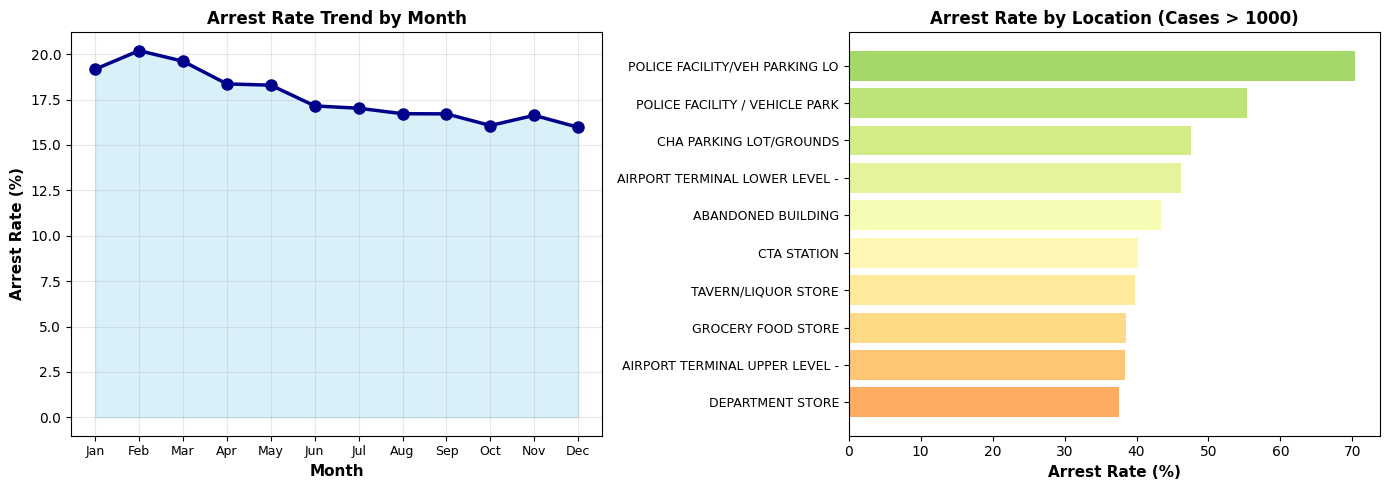

In [23]:
# 按月份逮捕率可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 逮捕率趋势
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.plot(monthly_arrest.index, monthly_arrest['逮捕率(%)'].values, marker='o', linewidth=2.5, markersize=8, color='darkblue')
ax1.fill_between(monthly_arrest.index, monthly_arrest['逮捕率(%)'].values, alpha=0.3, color='skyblue')
ax1.set_xlabel('Month', fontsize=11, fontweight='bold')
ax1.set_ylabel('Arrest Rate (%)', fontsize=11, fontweight='bold')
ax1.set_title('Arrest Rate Trend by Month', fontsize=12, fontweight='bold')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(months_labels, fontsize=9)
ax1.grid(True, alpha=0.3)

# 4. 地点与逮捕率
print(f"\n【地点与逮捕率】")
location_arrest = df.groupby('location_description').agg({
    'arrest': ['sum', 'count']
}).round(2)
location_arrest.columns = ['逮捕数', '总数']
location_arrest['逮捕率(%)'] = (location_arrest['逮捕数'] / location_arrest['总数'] * 100).round(2)
location_arrest = location_arrest[location_arrest['总数'] > 1000].sort_values('逮捕率(%)', ascending=False).head(10)
print(location_arrest[['逮捕率(%)']])

location_arrest_sorted = location_arrest.sort_values('逮捕率(%)', ascending=True)
colors_loc = plt.cm.RdYlGn(np.linspace(0.3, 0.7, len(location_arrest_sorted)))
ax2.barh(range(len(location_arrest_sorted)), location_arrest_sorted['逮捕率(%)'].values, color=colors_loc)
ax2.set_yticks(range(len(location_arrest_sorted)))
ax2.set_yticklabels([label[:30] for label in location_arrest_sorted.index], fontsize=9)
ax2.set_xlabel('Arrest Rate (%)', fontsize=11, fontweight='bold')
ax2.set_title('Arrest Rate by Location (Cases > 1000)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 第10部分：犯罪类型与位置的关联


犯罪类型与位置关联分析

【Top 8犯罪类型在Top 8地点的分布】
location_description  ALLEY  APARTMENT  OTHER  RESIDENCE  RESTAURANT  \
primary_type                                                           
ASSAULT                4930      39609   3583      30468        5522   
BATTERY                9110     127939   5048      86334        6904   
CRIMINAL DAMAGE        5181      43385   4379      45449        4147   
DECEPTIVE PRACTICE      253      32048  11422      58842        6151   
MOTOR VEHICLE THEFT    3061       1734   1280       3209         132   
NARCOTICS              7258       3647    786       3940         308   
OTHER OFFENSE          1385      36822   6755      53455        1562   
THEFT                  4849      52615  16407      44939       21105   

location_description  SIDEWALK  SMALL RETAIL STORE  STREET  
primary_type                                                
ASSAULT                  20164                4460   38167  
BATTERY                  55699                3470   64885 

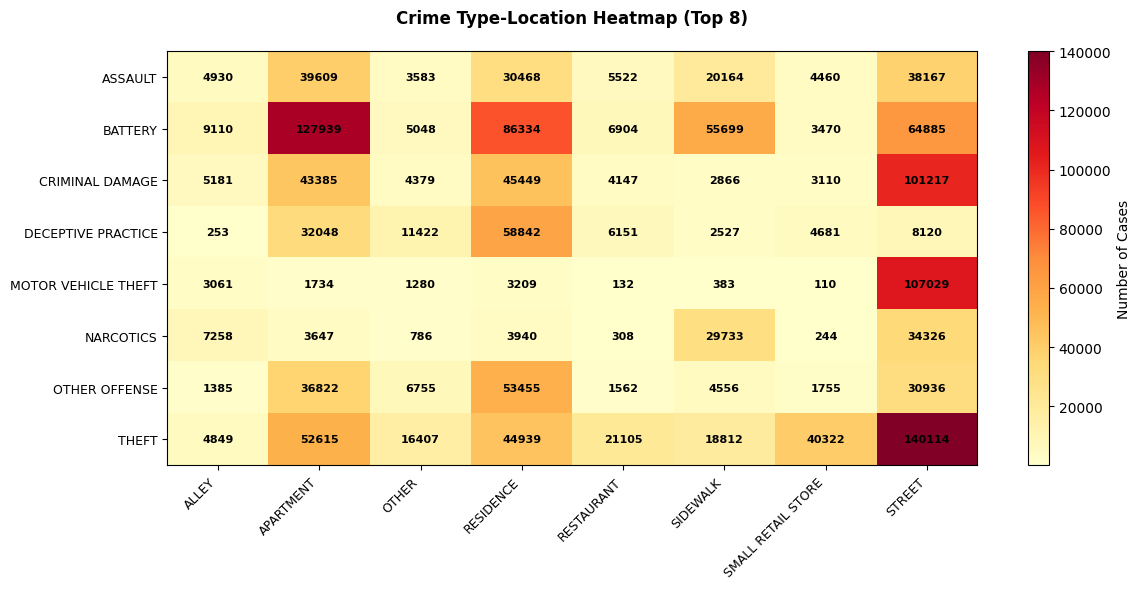


【特定犯罪类型的高发地点】

THEFT:
  - STREET: 140,114 (24.7%)
  - APARTMENT: 52,615 (9.3%)
  - RESIDENCE: 44,939 (7.9%)

BATTERY:
  - APARTMENT: 127,939 (27.7%)
  - RESIDENCE: 86,334 (18.7%)
  - STREET: 64,885 (14.1%)

CRIMINAL DAMAGE:
  - STREET: 101,217 (36.3%)
  - RESIDENCE: 45,449 (16.3%)
  - APARTMENT: 43,385 (15.5%)


In [32]:
print("\n" + "="*80)
print("犯罪类型与位置关联分析")
print("="*80)

# 创建犯罪类型-位置关联矩阵
# 获取Top 8犯罪类型和Top 8地点
top_8_crimes = df['primary_type'].value_counts().head(8).index
top_8_locations = df['location_description'].value_counts().head(8).index

# 筛选数据并创建交叉表（计数真实案件数）
df_filtered = df[df['primary_type'].isin(top_8_crimes) & df['location_description'].isin(top_8_locations)]
crime_location_pivot = pd.crosstab(df_filtered['primary_type'], df_filtered['location_description'])

print(f"\n【Top 8犯罪类型在Top 8地点的分布】")
print(crime_location_pivot)

# 热力图
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(crime_location_pivot.values, cmap='YlOrRd', aspect='auto')

# 设置刻度标签
ax.set_xticks(range(len(crime_location_pivot.columns)))
ax.set_yticks(range(len(crime_location_pivot.index)))
ax.set_xticklabels([label[:20] for label in crime_location_pivot.columns], rotation=45, ha='right', fontsize=9)
ax.set_yticklabels([label[:20] for label in crime_location_pivot.index], fontsize=9)

# 添加颜色条
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Number of Cases', fontsize=10)

ax.set_title('Crime Type-Location Heatmap (Top 8)', fontsize=12, fontweight='bold', pad=20)

# 添加数值标签
for i in range(len(crime_location_pivot.index)):
    for j in range(len(crime_location_pivot.columns)):
        value = crime_location_pivot.iloc[i, j]
        if value > 0:
            text = ax.text(j, i, int(value),
                          ha="center", va="center", color="black", fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# 探索特定犯罪的高发地点
print(f"\n【特定犯罪类型的高发地点】")
for crime in ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']:
    if crime in df['primary_type'].values:
        locations = df[df['primary_type'] == crime]['location_description'].value_counts().head(3)
        print(f"\n{crime}:")
        for loc, count in locations.items():
            pct = count / df[df['primary_type'] == crime].shape[0] * 100
            print(f"  - {loc}: {count:,} ({pct:.1f}%)")

## 第11部分：犯罪趋势变化分析


📉 主要犯罪类型年度趋势分析

【Top 5犯罪类型年度统计】
primary_type  ASSAULT  BATTERY  CRIMINAL DAMAGE  DECEPTIVE PRACTICE  THEFT
year                                                                      
2015            17048    48927            28677               16490  57353
2016            18743    50300            31018               19440  61627
2017            19306    49241            29045               19808  64387
2018            20408    49833            27823               19992  65291
2019            20624    49525            26683               19285  62499
2020            18260    41518            24882               18622  41354
2021            20344    40483            25095               17926  40824
2022            20814    40964            27250               17127  54899
2023            22631    44251            30094               17489  57506
2024            23479    46144            28555               16211  60527


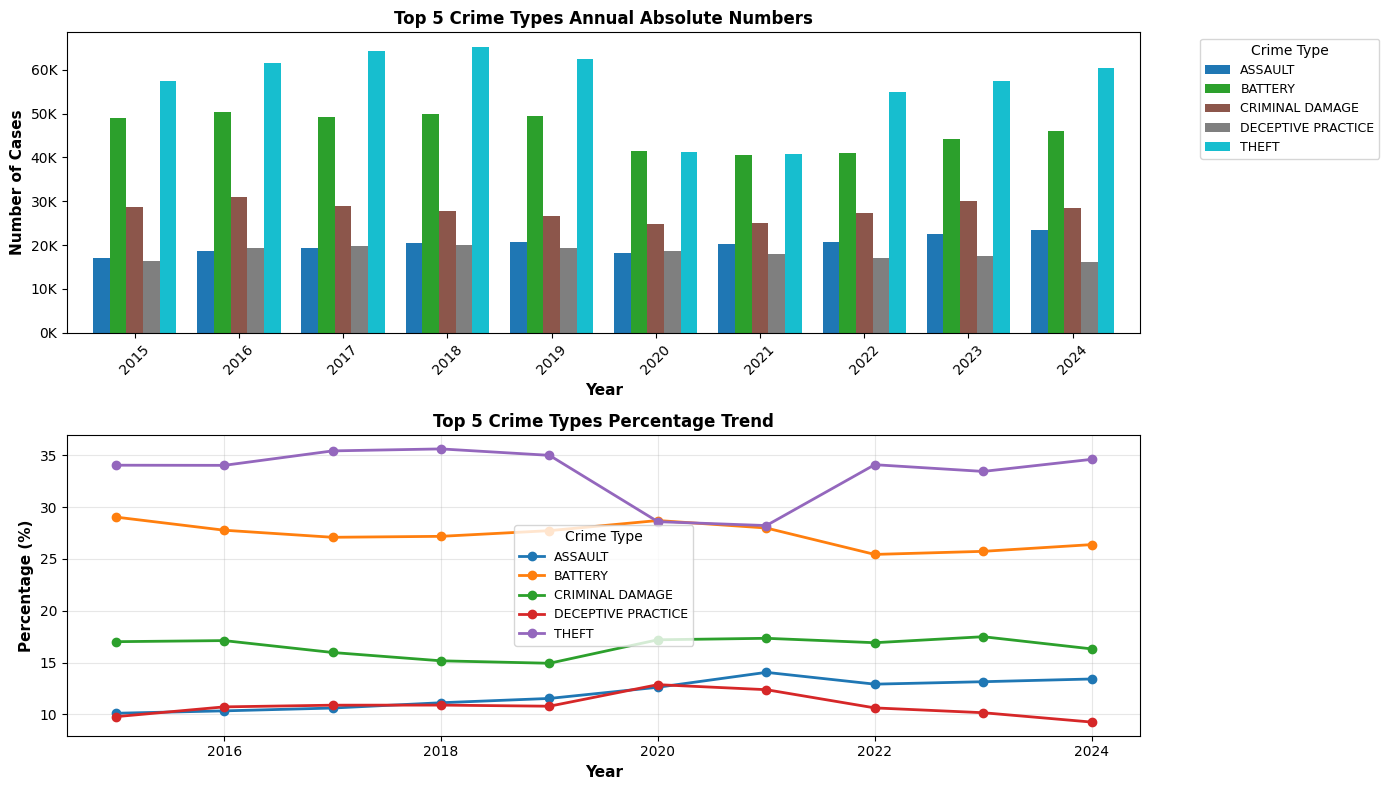


【犯罪增长率分析（2015-2024）】
↓ BATTERY                            :     -5.7%
↓ DECEPTIVE PRACTICE                 :     -1.7%
↓ CRIMINAL DAMAGE                    :     -0.4%
↑ THEFT                              :      5.5%
↑ ASSAULT                            :     37.7%


In [25]:
print("\n" + "="*80)
print("📉 主要犯罪类型年度趋势分析")
print("="*80)

# 获取Top 5犯罪类型的年度数据
top_5_crimes = df['primary_type'].value_counts().head(5).index.tolist()
yearly_crime_trends = df[df['primary_type'].isin(top_5_crimes)].groupby(['year', 'primary_type']).size().unstack(fill_value=0)

print(f"\n【Top 5犯罪类型年度统计】")
print(yearly_crime_trends)

# 绘制趋势图
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# 堆积柱状图（绝对值）
yearly_crime_trends.plot(kind='bar', ax=axes[0], width=0.8, colormap='tab10')
axes[0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
axes[0].set_title('Top 5 Crime Types Annual Absolute Numbers', fontsize=12, fontweight='bold')
axes[0].legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
axes[0].tick_params(axis='x', rotation=45)

# 变化率分析 - 修复：确保数据类型正确
yearly_totals = yearly_crime_trends.sum(axis=1)  # 计算每年的总数
yearly_crime_pct = yearly_crime_trends.div(yearly_totals, axis=0) * 100  # 按行归一化

yearly_crime_pct.plot(ax=axes[1], marker='o', linewidth=2, markersize=6)
axes[1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
axes[1].set_title('Top 5 Crime Types Percentage Trend', fontsize=12, fontweight='bold')
axes[1].legend(title='Crime Type', loc='best', fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 计算增长率 - 修复：更安全的处理方式
print(f"\n【犯罪增长率分析（2015-2024）】")
crime_growth = []
for crime in top_5_crimes:
    crime_data = df[df['primary_type'] == crime].groupby('year').size().sort_index()
    if len(crime_data) >= 2:  # 至少有2个年份数据
        growth = ((crime_data.iloc[-1] - crime_data.iloc[0]) / crime_data.iloc[0]) * 100
        crime_growth.append({'犯罪类型': crime, '增长率(%)': growth})

if crime_growth:
    crime_growth_df = pd.DataFrame(crime_growth).sort_values('增长率(%)')
    for idx, row in crime_growth_df.iterrows():
        sign = '↑' if row['增长率(%)'] > 0 else '↓'
        print(f"{sign} {row['犯罪类型']:35s}: {row['增长率(%)']:>8.1f}%")
else:
    print("无法计算增长率数据")

## 第12部分：FBI犯罪分类体系分析


FBI犯罪分类体系分析

【FBI犯罪分类分布】
 1. 06          567,044 起 ( 22.51%)
 2. 08B         388,101 起 ( 15.40%)
 3. 14          279,122 起 ( 11.08%)
 4. 26          181,842 起 (  7.22%)
 5. 08A         178,179 起 (  7.07%)
 6. 11          164,898 起 (  6.54%)
 7. 07          144,703 起 (  5.74%)
 8. 18          106,743 起 (  4.24%)
 9. 05          100,017 起 (  3.97%)
10. 03           96,059 起 (  3.81%)
11. 04B          78,965 起 (  3.13%)
12. 15           67,362 起 (  2.67%)
13. 04A          64,236 起 (  2.55%)
14. 24           21,506 起 (  0.85%)
15. 02           18,425 起 (  0.73%)


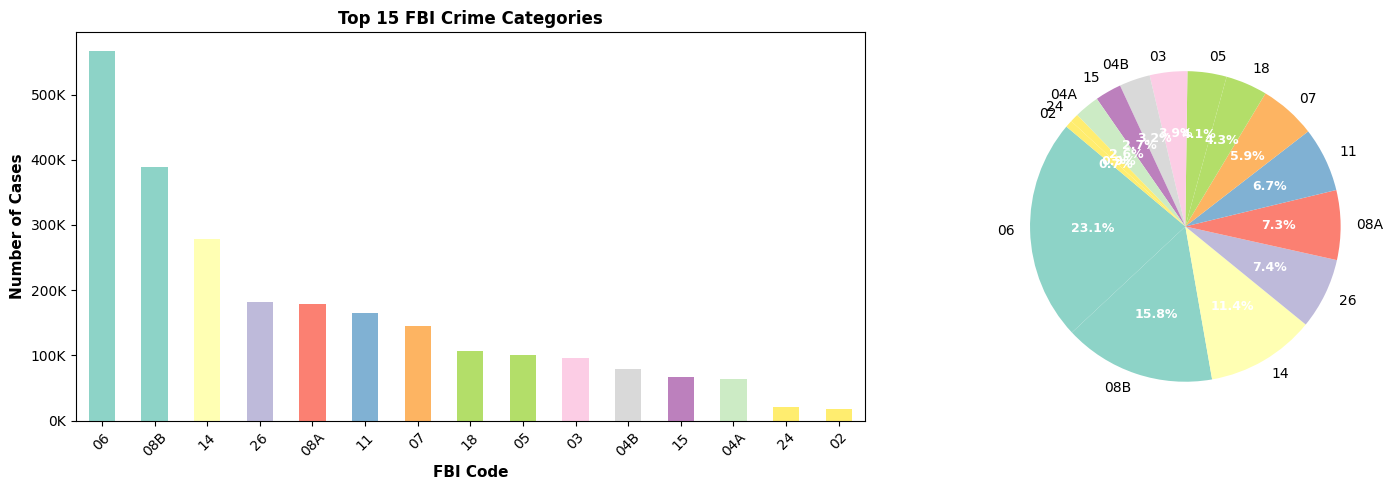

In [34]:
print("\n" + "="*80)
print("FBI犯罪分类体系分析")
print("="*80)

# FBI分类统计
print(f"\n【FBI犯罪分类分布】")
fbi_counts = df['fbi_code'].value_counts().head(15)
for idx, (code, count) in enumerate(fbi_counts.items(), 1):
    pct = count / len(df) * 100
    print(f"{idx:2d}. {str(code):8s} {count:>10,} 起 ({pct:>6.2f}%)")

# FBI分类可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# 柱状图
fbi_counts.plot(kind='bar', ax=ax1, color=plt.cm.Set3(np.linspace(0, 1, len(fbi_counts))))
ax1.set_xlabel('FBI Code', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 FBI Crime Categories', fontsize=12, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
ax1.tick_params(axis='x', rotation=45)

# 饼图
autotexts = ax2.pie(fbi_counts, labels=fbi_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3(np.linspace(0, 1, len(fbi_counts))))[2]

# 设置自动文本的字体大小
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)

plt.tight_layout()
plt.show()